<a href="https://colab.research.google.com/github/Vinaysh259/SOLA_Implementation/blob/master/MULTI_LABEL_IMPLEMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

**bold**

In [0]:
data_path = "/Users/MAHE/Desktop/Implementaions/train_data_binary.csv"

In [0]:
data_raw = pd.read_csv(data_path)
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data_raw.shape

(3371, 12)

In [0]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 3371
Number of columns in data = 12




**Sample data:**

,BUILDING,VALUE,BUSINESS,CHECKIN,LOCATION,FOOD,CLEANLINESS,ROOMS,SERVICE,NOTRELATED,OTHER,SEGMENTS
0,0,0,0,0,0,0,0,0,0,0,1,LOVED THE HAMPTON INN SEAPORT!!!!!!!!!!!!!!!!!!
1,0,0,0,0,0,0,0,0,0,1,0,Just returned from a 3 night stay.
2,0,0,0,0,0,0,0,0,0,0,1,This is a FABULOUS hotel.
3,0,0,0,0,0,0,0,0,1,0,0,"The front desk staff, the doormen, the breakfa..."
4,0,0,0,0,0,0,0,1,0,0,0,The room was fabulous too.


In [0]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

BUILDING       0
VALUE          0
BUSINESS       0
CHECKIN        0
LOCATION       0
FOOD           0
CLEANLINESS    0
ROOMS          0
SERVICE        0
NOTRELATED     0
OTHER          0
SEGMENTS       0
dtype: int64


In [0]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  3371
Number of clean comments =  810
Number of comments with labels = 2561


In [0]:
categories = list(data_raw.columns.values)
categories = categories[:11]
print(categories)

['BUILDING', 'VALUE', 'BUSINESS', 'CHECKIN', 'LOCATION', 'FOOD', 'CLEANLINESS', 'ROOMS', 'SERVICE', 'NOTRELATED', 'OTHER']


In [0]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,BUILDING,162
1,VALUE,182
2,BUSINESS,17
3,CHECKIN,96
4,LOCATION,302
5,FOOD,284
6,CLEANLINESS,140
7,ROOMS,531
8,SERVICE,471
9,NOTRELATED,228


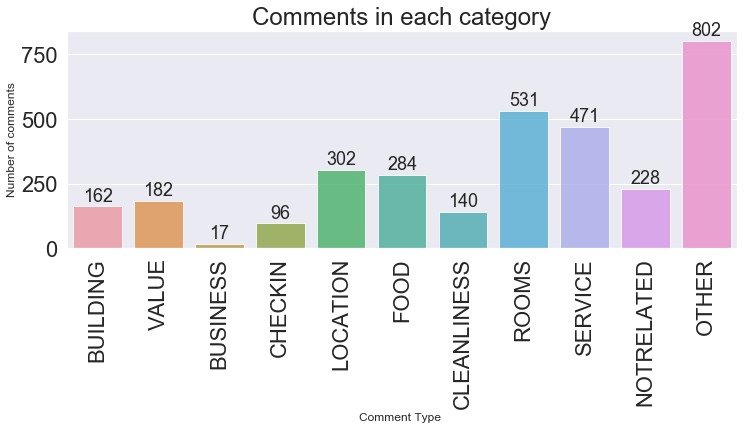

In [0]:
sns.set(font_scale = 2)
plt.figure(figsize=(12,4))

ax= sns.barplot(categories, data_raw.iloc[:,:11].sum().values,alpha = 0.8)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=12)
plt.xlabel('Comment Type ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,:11].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.xticks(rotation=90)
plt.show()



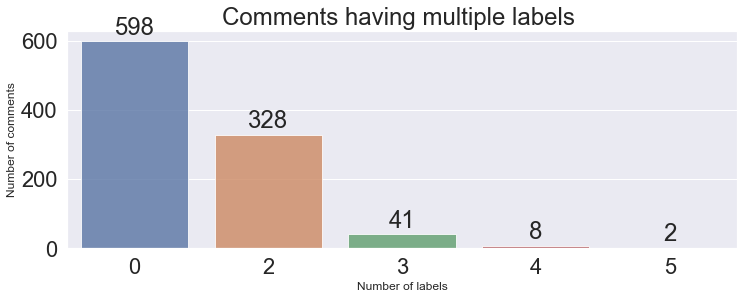

In [0]:
rowSums = data_raw.iloc[:,:11].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(12,4))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values,alpha = 0.8)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=12)
plt.xlabel('Number of labels', fontsize=12)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

#plt.xticks(rotation=90)    
plt.show()

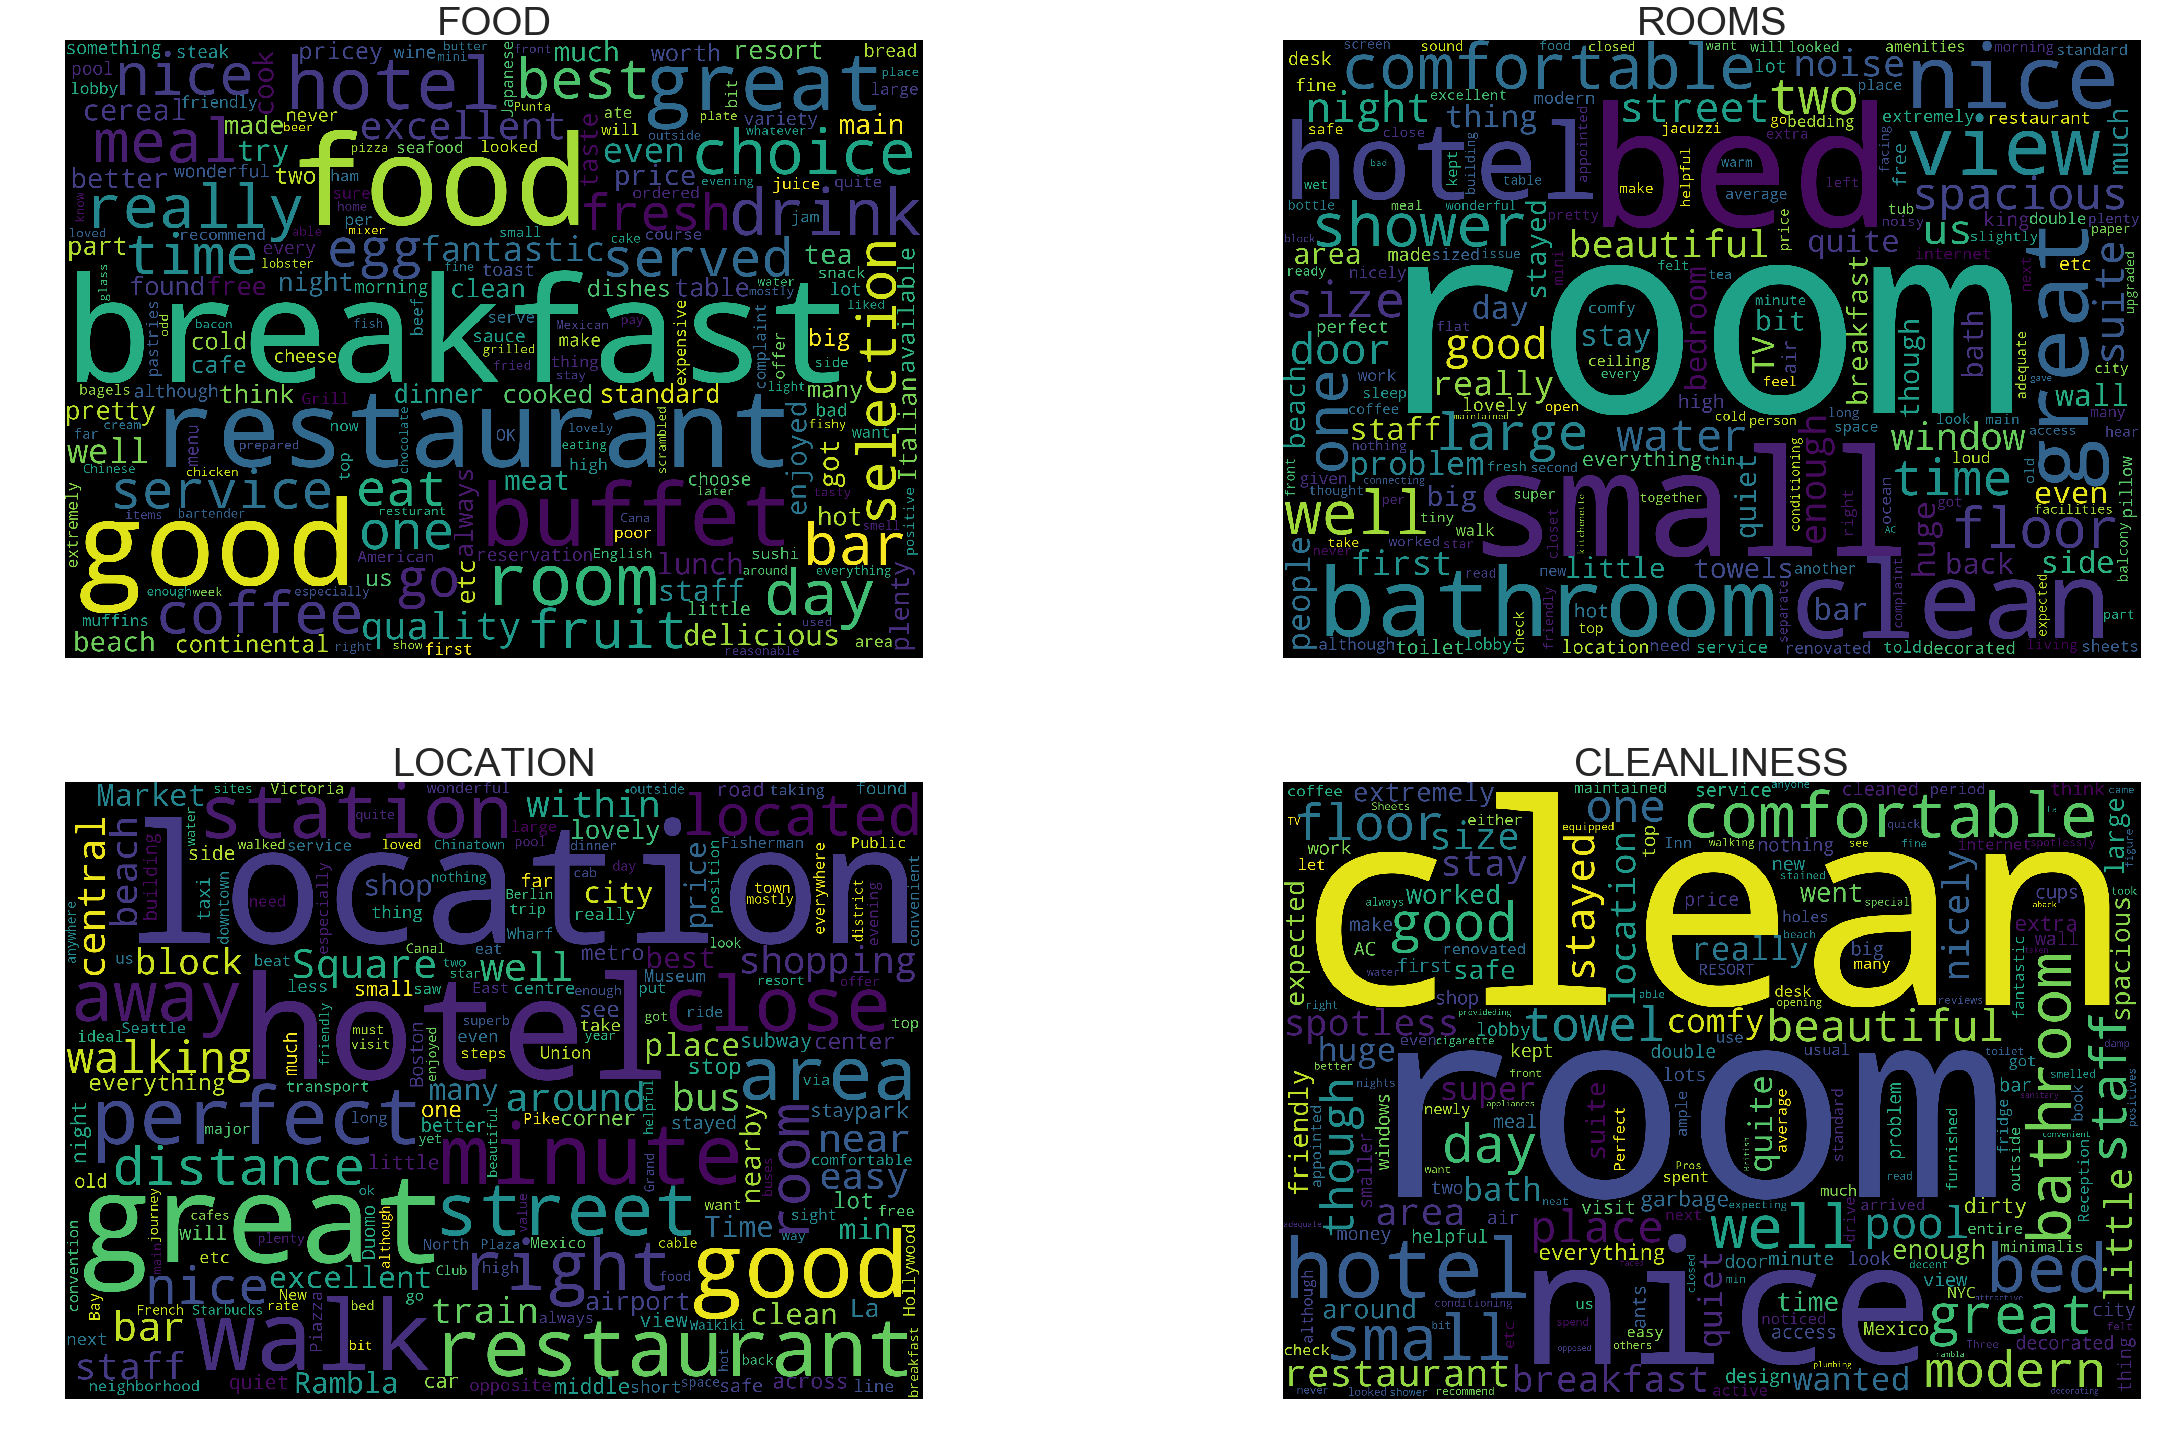

In [0]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# FOOD
subset = data_raw[data_raw.FOOD==1]
text = subset.SEGMENTS.values
cloud_FOOD = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 2, 1)
plt.axis('off')
plt.title("FOOD",fontsize=40)
plt.imshow(cloud_FOOD)

# ROOMS
subset = data_raw[data_raw.ROOMS==1]
text = subset.SEGMENTS.values
cloud_ROOMS = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 2, 2)
plt.axis('off')
plt.title("ROOMS",fontsize=40)
plt.imshow(cloud_ROOMS)


# LOCATION
subset = data_raw[data_raw.LOCATION==1]
text = subset.SEGMENTS.values
cloud_LOCATION = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 2, 3)
plt.axis('off')
plt.title("LOCATION",fontsize=40)
plt.imshow(cloud_LOCATION)


# CLEANLINESS
subset = data_raw[data_raw.CLEANLINESS==1]
text = subset.SEGMENTS.values
cloud_CLEANLINESS = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 2, 4)
plt.axis('off')
plt.title("CLEANLINESS",fontsize=40)
plt.imshow(cloud_CLEANLINESS)


plt.show()



In [0]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 12)

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [0]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [0]:
data['SEGMENTS'] = data['SEGMENTS'].str.lower()
data['SEGMENTS'] = data['SEGMENTS'].apply(cleanHtml)
data['SEGMENTS'] = data['SEGMENTS'].apply(cleanPunc)
data['SEGMENTS'] = data['SEGMENTS'].apply(keepAlpha)
data.head()

,BUILDING,VALUE,BUSINESS,CHECKIN,LOCATION,FOOD,CLEANLINESS,ROOMS,SERVICE,NOTRELATED,OTHER,SEGMENTS
964,1,0,0,0,0,0,0,0,0,0,0,pool beautiful well kept lots of shade and t...
1892,0,0,0,0,0,0,0,0,0,0,1,everything else was extremely positive after t...
1600,0,0,0,0,1,0,0,0,0,0,0,well served by buses and a metro station less ...
1697,0,0,0,0,1,0,0,0,0,0,0,not a far walk to the duomo farther walk to uf...
2883,0,0,0,0,0,0,0,1,0,0,0,everything else in the room was fine


In [0]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['SEGMENTS'] = data['SEGMENTS'].apply(removeStopWords)
data.head()

,BUILDING,VALUE,BUSINESS,CHECKIN,LOCATION,FOOD,CLEANLINESS,ROOMS,SERVICE,NOTRELATED,OTHER,SEGMENTS
964,1,0,0,0,0,0,0,0,0,0,0,pool beautiful well kept lots shade swim ...
1892,0,0,0,0,0,0,0,0,0,0,1,everything else extremely positive though
1600,0,0,0,0,1,0,0,0,0,0,0,well served buses metro station less min...
1697,0,0,0,0,1,0,0,0,0,0,0,far walk duomo farther walk ufizzi manag...
2883,0,0,0,0,0,0,0,1,0,0,0,everything else room fine


In [0]:
########   STEMMING IS USEFULL??????? ######
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['SEGMENTS'] = data['SEGMENTS'].apply(stemming)
data.head()

,BUILDING,VALUE,BUSINESS,CHECKIN,LOCATION,FOOD,CLEANLINESS,ROOMS,SERVICE,NOTRELATED,OTHER,SEGMENTS
964,1,0,0,0,0,0,0,0,0,0,0,pool beauti well kept lot shade swim bar great
1892,0,0,0,0,0,0,0,0,0,0,1,everyth els extrem posit though
1600,0,0,0,0,1,0,0,0,0,0,0,well serv buse metro station less minut walk away
1697,0,0,0,0,1,0,0,0,0,0,0,far walk duomo farther walk ufizzi manag like ...
2883,0,0,0,0,0,0,0,1,0,0,0,everyth els room fine


In [0]:
############   NOT NEEDED ############

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 12)
(600, 12)


In [0]:
train_text = train['SEGMENTS']
test_text = test['SEGMENTS']

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [0]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['SEGMENTS'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['SEGMENTS'], axis=1)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [0]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} SEGMENTS...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing BUILDING SEGMENTS...**

Test accuracy is 0.9533333333333334




**Processing VALUE SEGMENTS...**

Test accuracy is 0.95




**Processing BUSINESS SEGMENTS...**

Test accuracy is 0.995




**Processing CHECKIN SEGMENTS...**

Test accuracy is 0.9633333333333334




**Processing LOCATION SEGMENTS...**

Test accuracy is 0.92




**Processing FOOD SEGMENTS...**

Test accuracy is 0.92




**Processing CLEANLINESS SEGMENTS...**

Test accuracy is 0.9533333333333334




**Processing ROOMS SEGMENTS...**

Test accuracy is 0.8716666666666667




**Processing SERVICE SEGMENTS...**

Test accuracy is 0.8666666666666667




**Processing NOTRELATED SEGMENTS...**

Test accuracy is 0.9316666666666666




**Processing OTHER SEGMENTS...**

Test accuracy is 0.7866666666666666


Wall time: 6.44 s


In [0]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.5016666666666667


Wall time: 8.69 s


In [0]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [0]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.29


Wall time: 2.71 s


In [0]:
#USING LABEL POWER SET
from skmultilearn.problem_transform import LabelPowerset

In [0]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")


Accuracy =  0.46166666666666667


Wall time: 557 ms


In [0]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [0]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")


Accuracy =  0.38


Wall time: 42.8 s
